# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner

- 7 light


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm2/', 'dsual.h5')


Path ualm: ./data/ozm2/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp        W      VAR          VA        f      VLN        PF  \
0      1.643793e+12  15.0957 -5.94440  187.123940  50.0110  243.978  0.657079   
1      1.643793e+12  15.3969 -6.37038  207.713360  50.0106  243.925  0.638892   
2      1.643793e+12  14.7063 -5.62044  163.500422  50.0106  243.976  0.634458   
3      1.643793e+12  15.4979 -6.30862  215.112895  50.0102  243.971  0.652569   
4      1.643793e+12  15.3228 -5.62764  202.446986  50.0100  243.933  0.655938   
...             ...      ...      ...         ...      ...      ...       ...   
48511  1.643803e+12  13.3789 -6.02801  103.210865  50.0223  242.323  0.645517   
48512  1.643803e+12  12.3869 -5.94603   73.183788  50.0223  242.367  0.635764   
48513  1.643803e+12  12.4862 -5.49164   75.746262  50.0227  242.406  0.644249   
48514  1.643

..Reading file csv
          timestamp        W       VAR         VA        f      VLN        PF  \
0      1.643793e+12  7.25848 -3.885250  12.376734  50.0110  243.978  0.739438   
1      1.643793e+12  7.37695  0.586471  12.950735  50.0106  243.925  0.178266   
2      1.643793e+12  7.22196 -3.174690  12.222902  50.0106  243.976  0.562593   
3      1.643793e+12  6.87873 -4.443890  10.850176  50.0102  243.971  0.581978   
4      1.643793e+12  6.43881 -3.529630   9.318674  50.0100  243.933  0.269962   
...             ...      ...       ...        ...      ...      ...       ...   
48511  1.643803e+12  1.56561 -2.746650   1.763242  50.0223  242.323  0.038044   
48512  1.643803e+12  4.40929 -4.172250   4.615623  50.0223  242.367  0.207254   
48513  1.643803e+12  6.10912 -3.752660   8.312802  50.0227  242.406  0.700616   
48514  1.643803e+12  5.57109 -3.783550   6.900237  50.0225  242.370  0.681653   
48515  1.643803e+12  5.92833 -3.828580   7.808245  50.0225  242.350  0.674002   

        

..Reading file csv
          timestamp         W       VAR        VA        f      VLN        PF  \
0      1.643793e+12  0.634897 -0.100012  1.576659  50.0083  233.361  0.075361   
1      1.643793e+12  0.501862 -0.162870  1.519634  50.0080  233.301  0.062180   
2      1.643793e+12  0.271555  0.004115  1.486595  50.0080  233.339  0.032769   
3      1.643793e+12  0.410615 -0.429794  1.439312  50.0077  233.322  0.050659   
4      1.643793e+12  0.557451 -0.178848  1.534625  50.0077  233.328  0.067945   
...             ...       ...       ...       ...      ...      ...       ...   
48512  1.643803e+12  0.560295 -0.104729  1.550661  50.0195  231.831  0.068362   
48513  1.643803e+12  0.281082 -0.404745  1.403736  50.0198  231.861  0.034377   
48514  1.643803e+12  0.132050 -0.177390  1.407178  50.0202  231.911  0.016458   
48515  1.643803e+12  0.282857 -0.134986  1.458520  50.0202  231.819  0.034948   
48516  1.643803e+12  0.092201 -0.224565  1.386307  50.0202  231.801  0.011162   

        

..Reading file csv
          timestamp         W       VAR         VA        f      VLN  \
0      1.643793e+12  12.62320 -2.935850  79.430157  50.0110  243.978   
1      1.643793e+12  13.01330 -0.035278  90.933195  50.0106  243.925   
2      1.643793e+12  12.30800 -1.983870  71.211383  50.0106  243.976   
3      1.643793e+12  11.68660 -4.013200  57.413319  50.0102  243.971   
4      1.643793e+12  12.33460 -2.993800  71.869988  50.0100  243.933   
...             ...       ...       ...        ...      ...      ...   
48511  1.643803e+12   9.82598 -2.289140  30.130497  50.0223  242.323   
48512  1.643803e+12  11.03830 -3.162660  45.860758  50.0223  242.367   
48513  1.643803e+12  10.98550 -2.070190  45.030629  50.0227  242.406   
48514  1.643803e+12  11.06740 -2.472790  46.326332  50.0225  242.370   
48515  1.643803e+12  10.26000 -3.716580  35.018485  50.0225  242.350   

             PF         A  
0      0.679814  0.076108  
1      0.398720  0.133802  
2      0.527227  0.095685  
3   

          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.643793e+12  5.07369 -3.85003  5.809157  50.0110  243.978  0.585986   
1      1.643793e+12  4.56161 -3.78620  4.866943  50.0106  243.925  0.476760   
2      1.643793e+12  5.58936 -3.93026  6.943495  50.0106  243.976  0.540988   
3      1.643793e+12  5.58604 -3.49818  6.937173  50.0102  243.971  0.630758   
4      1.643793e+12  5.16944 -3.64125  6.005668  50.0100  243.933  0.616410   
...             ...      ...      ...       ...      ...      ...       ...   
48511  1.643803e+12  4.11969 -2.96387  4.184757  50.0223  242.323  0.630946   
48512  1.643803e+12  4.83602 -3.64499  5.351807  50.0223  242.367  0.649369   
48513  1.643803e+12  4.59219 -3.76522  4.918748  50.0227  242.406  0.631628   
48514  1.643803e+12  4.15934 -3.69509  4.236228  50.0225  242.370  0.593773   
48515  1.643803e+12  4.55367 -3.26444  4.856861  50.0225  242.350  0.527659   

              A  
0      0.035488  
1      0.039225

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.643793e+12  3.15377 -0.320780  3.114550  50.0090  234.138  0.311626   
1      1.643793e+12  3.01996  0.214559  3.044963  50.0083  234.082  0.292929   
2      1.643793e+12  3.19063 -0.265590  3.156256  50.0080  234.111  0.311567   
3      1.643793e+12  3.17792  0.009857  3.171257  50.0080  234.132  0.307465   
4      1.643793e+12  2.92828 -0.015573  2.932795  50.0080  234.127  0.285350   
...             ...      ...       ...       ...      ...      ...       ...   
48511  1.643803e+12  1.98335  0.100063  2.241857  50.0198  232.598  0.214833   
48512  1.643803e+12  2.50022  0.347235  2.632458  50.0202  232.659  0.262371   
48513  1.643803e+12  2.40756 -0.456279  2.456548  50.0205  232.648  0.248340   
48514  1.643803e+12  2.38157 -0.082187  2.481060  50.0205  232.644  0.250429   
48515  1.643803e+12  2.43522 -0.137954  2.513419  50.0208  232.636  0.255359   

              A  
0 

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [75]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [76]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [77]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [78]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [79]:
elec.mains().power_series_all_data().head()

2022-02-02 10:16:17+01:00    15.24630
2022-02-02 10:16:18+01:00    14.94546
2022-02-02 10:16:19+01:00    15.24516
2022-02-02 10:16:20+01:00    14.94808
2022-02-02 10:16:21+01:00    15.18322
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [80]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)

### Etiquetas de dispositivos

In [81]:
labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum cleaner', 'boiler']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [82]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [83]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [84]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [85]:
boiler_meter = elec['boiler']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [86]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [87]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [88]:
boiler_meter.dominant_appliance()

Appliance(type='boiler', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [89]:
boiler_meter.total_energy() # kWh

apparent    13.395396
reactive     0.007068
active       2.001101
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [90]:
next(boiler_meter.load())

physical_quantity          frequency   current     power        pf     power  \
type                                              active            apparent   
2022-02-02 10:16:17+01:00  50.008652  0.043633  3.086865  0.302278  3.079756   
2022-02-02 10:16:18+01:00  50.007881  0.044120  3.084544  0.298886  3.071671   
2022-02-02 10:16:19+01:00  50.007099  0.044813  3.257280  0.310452  3.239354   
2022-02-02 10:16:20+01:00  50.006699  0.044665  3.138292  0.299884  3.122294   
2022-02-02 10:16:21+01:00  50.006580  0.044207  3.169228  0.306418  3.153147   
...                              ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  50.015633  0.041974  2.726953  0.279337  2.746888   
2022-02-02 12:57:57+01:00  50.017300  0.041150  2.478725  0.259083  2.557824   
2022-02-02 12:57:58+01:00  50.018665  0.041502  2.496318  0.258434  2.579961   
2022-02-02 12:57:59+01:00  50.020073  0.040888  2.381005  0.250005  2.499889   
2022-02-02 12:58:00+01:00  50.020653  0.040936  2.408395  0.252894  2.497240   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -0.053111  234.110001  
2022-02-02 10:16:18+01:00 -0.121318  234.119003  
2022-02-02 10:16:19+01:00 -0.146968  234.113800  
2022-02-02 10:16:20+01:00 -0.186774  234.115204  
2022-02-02 10:16:21+01:00 -0.189034  234.050598  
...                             ...         ...  
2022-02-02 12:57:56+01:00 -0.138407  232.637665  
2022-02-02 12:57:57+01:00 -0.076307  232.598999  
2022-02-02 12:57:58+01:00 -0.021937  232.663330  
2022-02-02 12:57:59+01:00 -0.032611  232.637497  
2022-02-02 12:58:00+01:00 -0.110070  232.639999  

[9704 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [91]:
next (boiler_meter.power_series())

2022-02-02 10:16:17+01:00    3.086865
2022-02-02 10:16:18+01:00    3.084544
2022-02-02 10:16:19+01:00    3.257280
2022-02-02 10:16:20+01:00    3.138292
2022-02-02 10:16:21+01:00    3.169228
                               ...   
2022-02-02 12:57:56+01:00    2.726953
2022-02-02 12:57:57+01:00    2.478725
2022-02-02 12:57:58+01:00    2.496318
2022-02-02 12:57:59+01:00    2.381005
2022-02-02 12:58:00+01:00    2.408395
Name: (power, active), Length: 9704, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

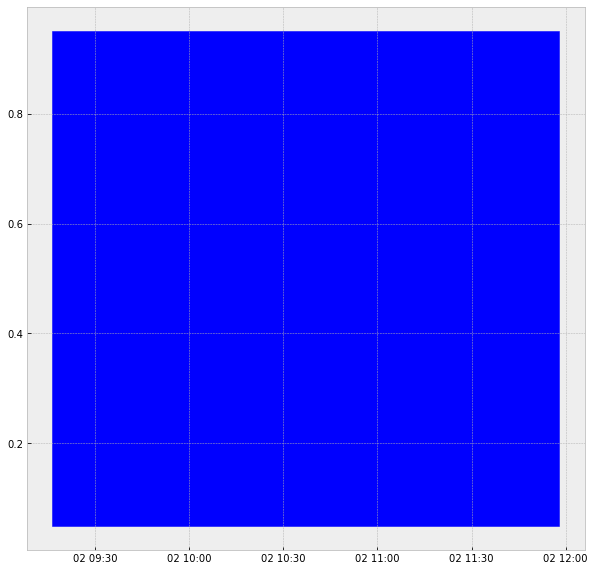

In [92]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [93]:
good_sections.combined()

[TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [94]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [95]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [96]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [97]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [98]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['frequency', 'power', 'voltage', 'pf', 'current']

In [99]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['frequency', 'power', 'voltage', 'pf', 'current']

In [100]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['frequency', 'power', 'voltage', 'pf', 'current']

In [101]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['frequency', 'power', 'voltage', 'pf', 'current']

In [102]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['frequency', 'power', 'voltage', 'pf', 'current']

In [103]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['frequency', 'power', 'voltage', 'pf', 'current']

In [104]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['frequency', 'power', 'voltage', 'pf', 'current']

## Medidas disponibles relativas a la potencia


In [105]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [106]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [107]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [108]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [109]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [110]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [111]:
freezer = elec['freezer']
freezer.available_columns()

[('frequency', None),
 ('current', None),
 ('power', 'active'),
 ('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('voltage', None)]

In [112]:
boiler = elec['boiler']
boiler.available_columns()

[('frequency', None),
 ('current', None),
 ('power', 'active'),
 ('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('voltage', None)]

In [113]:
fan = elec['fan']
fan.available_columns()

[('frequency', None),
 ('current', None),
 ('power', 'active'),
 ('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('voltage', None)]

In [114]:
television = elec['television']
television.available_columns()

[('frequency', None),
 ('current', None),
 ('power', 'active'),
 ('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('voltage', None)]

In [115]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('frequency', None),
 ('current', None),
 ('power', 'active'),
 ('pf', None),
 ('power', 'apparent'),
 ('power', 'reactive'),
 ('voltage', None)]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [116]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['frequency', 'power', 'voltage', 'pf', 'current']
Mediciones de Potencia disponibles - Dataset: ['apparent', 'active', 'reactive']

Medidas disponibles por cada medidor:
Main: ['frequency', 'power', 'voltage', 'pf', 'current']
Fan: ['frequency', 'power', 'voltage', 'pf', 'current']
Freezer: ['frequency', 'power', 'voltage', 'pf', 'current']
Television: ['frequency', 'power', 'voltage', 'pf', 'current']
Vacuum cleaner: ['frequency', 'power', 'voltage', 'pf', 'current']
boiler: ['frequency', 'power', 'voltage', 'pf', 'current']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Fan: ['active', 'apparent', 'reactive']
Freezer: ['active', 'apparent', 'reactive']
Television: ['active', 'apparent', 'reactive']
Vacuum cleaner: ['active', 'apparent', 'reactive']
boiler: ['active', 'apparent', 'reactive']


Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [117]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

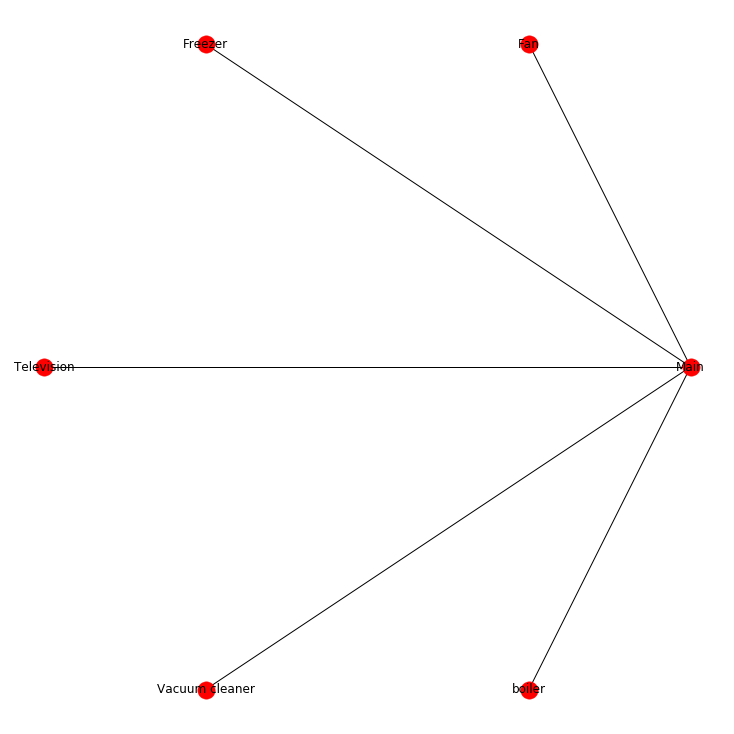

In [118]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [119]:
elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [120]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:8])]
df

,Fan,Freezer,Television,Vacuum cleaner,boiler
2022-02-02 10:16:00+01:00,17.954218,39.310848,18.609200,250.311172,436.930298
2022-02-02 10:17:00+01:00,43.220459,60.676174,41.796200,832.943604,1522.467896
2022-02-02 10:18:00+01:00,42.596241,58.401184,41.576984,823.910522,1507.484619
2022-02-02 10:19:00+01:00,42.179371,59.043556,41.534763,810.206299,1481.499878
2022-02-02 10:20:00+01:00,42.003288,59.041161,41.430031,812.386963,1487.745850
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,5.841594,0.308854,11.128838,4.650007,2.611770
2022-02-02 12:55:00+01:00,5.937994,0.334433,11.159833,4.660892,2.666440
2022-02-02 12:56:00+01:00,6.011952,0.252644,11.184495,4.647783,2.679903
2022-02-02 12:57:00+01:00,6.029858,0.271382,11.223354,4.623586,2.638799


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [121]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,Fan,Freezer,Television,Vacuum cleaner,boiler
2022-02-02 10:16:00+01:00,-3.354744,10.773724,-4.422327,13.827636,1.511064
2022-02-02 10:17:00+01:00,-3.040452,15.653749,-9.082592,50.586582,5.480077
2022-02-02 10:18:00+01:00,-3.395517,15.130448,-9.175824,49.239399,5.371400
2022-02-02 10:19:00+01:00,-3.690959,14.724609,-9.317194,48.150627,5.222862
2022-02-02 10:20:00+01:00,-3.696784,14.797137,-9.450023,47.401402,5.275593
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,-3.618885,-0.051677,-2.688369,-3.480539,-0.208731
2022-02-02 12:55:00+01:00,-3.655366,-0.058075,-2.640547,-3.471927,-0.249659
2022-02-02 12:56:00+01:00,-3.579227,-0.032446,-2.628408,-3.466259,-0.201040
2022-02-02 12:57:00+01:00,-3.642658,-0.059790,-2.611041,-3.456803,-0.159421


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [122]:
Devices = elec.select(instance=[2,3,4,5,6])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:7])]
df

,Fan,Freezer,Television,Vacuum cleaner,boiler
2022-02-02 10:16:00+01:00,1.244050e+07,inf,4.711047e+07,inf,inf
2022-02-02 10:17:00+01:00,3.519612e+06,7.401198e+09,1.998983e+06,inf,inf
2022-02-02 10:18:00+01:00,3.040145e+06,6.236346e+08,2.145365e+06,inf,inf
2022-02-02 10:19:00+01:00,2.559435e+06,7.733521e+08,2.424222e+06,inf,inf
2022-02-02 10:20:00+01:00,2.430662e+06,7.781494e+08,2.314534e+06,inf,inf
...,...,...,...,...,...
2022-02-02 12:54:00+01:00,8.115088e+00,1.490867e+00,4.901978e+01,5.047424,2.654825
2022-02-02 12:55:00+01:00,9.680501e+00,1.496054e+00,5.061599e+01,5.069400,2.694937
2022-02-02 12:56:00+01:00,1.281587e+01,1.478277e+00,5.209932e+01,5.040105,2.710185
2022-02-02 12:57:00+01:00,1.981141e+01,1.479389e+00,5.569571e+01,5.000613,2.681170


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [123]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2022-02-02 10:16:00+01:00 to 2022-02-02 12:58:00+01:00
Freq: 60S
Data columns (total 5 columns):
(Fan,)               163 non-null float32
(Freezer,)           163 non-null float32
(Television,)        163 non-null float32
(Vacuum cleaner,)    163 non-null float32
(boiler,)            163 non-null float32
dtypes: float32(5)
memory usage: 4.5 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 6(Vacuum Cleaner) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [124]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 
df_vac

physical_quantity          frequency   current     power        pf     power  \
type                                              active            apparent   
2022-02-02 10:16:17+01:00  50.008652  0.043633  3.086865  0.302278  3.079756   
2022-02-02 10:16:18+01:00  50.007881  0.044120  3.084544  0.298886  3.071671   
2022-02-02 10:16:19+01:00  50.007099  0.044813  3.257280  0.310452  3.239354   
2022-02-02 10:16:20+01:00  50.006699  0.044665  3.138292  0.299884  3.122294   
2022-02-02 10:16:21+01:00  50.006580  0.044207  3.169228  0.306418  3.153147   
...                              ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  50.015633  0.041974  2.726953  0.279337  2.746888   
2022-02-02 12:57:57+01:00  50.017300  0.041150  2.478725  0.259083  2.557824   
2022-02-02 12:57:58+01:00  50.018665  0.041502  2.496318  0.258434  2.579961   
2022-02-02 12:57:59+01:00  50.020073  0.040888  2.381005  0.250005  2.499889   
2022-02-02 12:58:00+01:00  50.020653  0.040936  2.408395  0.252894  2.497240   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -0.053111  234.110001  
2022-02-02 10:16:18+01:00 -0.121318  234.119003  
2022-02-02 10:16:19+01:00 -0.146968  234.113800  
2022-02-02 10:16:20+01:00 -0.186774  234.115204  
2022-02-02 10:16:21+01:00 -0.189034  234.050598  
...                             ...         ...  
2022-02-02 12:57:56+01:00 -0.138407  232.637665  
2022-02-02 12:57:57+01:00 -0.076307  232.598999  
2022-02-02 12:57:58+01:00 -0.021937  232.663330  
2022-02-02 12:57:59+01:00 -0.032611  232.637497  
2022-02-02 12:58:00+01:00 -0.110070  232.639999  

[9704 rows x 7 columns]

Se puede visualizar solo la cabecera de los datos

In [125]:
df_vac.head()

physical_quantity          frequency   current     power        pf     power  \
type                                              active            apparent   
2022-02-02 10:16:17+01:00  50.008652  0.043633  3.086865  0.302278  3.079756   
2022-02-02 10:16:18+01:00  50.007881  0.044120  3.084544  0.298886  3.071671   
2022-02-02 10:16:19+01:00  50.007099  0.044813  3.257280  0.310452  3.239354   
2022-02-02 10:16:20+01:00  50.006699  0.044665  3.138292  0.299884  3.122294   
2022-02-02 10:16:21+01:00  50.006580  0.044207  3.169228  0.306418  3.153147   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -0.053111  234.110001  
2022-02-02 10:16:18+01:00 -0.121318  234.119003  
2022-02-02 10:16:19+01:00 -0.146968  234.113800  
2022-02-02 10:16:20+01:00 -0.186774  234.115204  
2022-02-02 10:16:21+01:00 -0.189034  234.050598

Vemos para el meter nº 4(Freezer) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [126]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity          frequency   current      power        pf  \
type                                               active             
2022-02-02 10:16:17+01:00  50.010803  0.104955  12.818251  0.539267   
2022-02-02 10:16:18+01:00  50.010040  0.097902  11.498740  0.488291   
2022-02-02 10:16:19+01:00  50.008980  0.091361  11.669460  0.539092   
2022-02-02 10:16:20+01:00  50.007900  0.088446  12.179120  0.592928   
2022-02-02 10:16:21+01:00  50.006901  0.099596  11.600965  0.531982   
...                              ...       ...        ...       ...   
2022-02-02 12:57:56+01:00  50.018242  0.053747  10.897380  0.848906   
2022-02-02 12:57:57+01:00  50.020142  0.050391  10.887899  0.891519   
2022-02-02 12:57:58+01:00  50.021702  0.055415  11.133759  0.839234   
2022-02-02 12:57:59+01:00  50.022419  0.063484  10.865376  0.736858   
2022-02-02 12:58:00+01:00  50.022499  0.075938  10.663700  0.651972   

physical_quantity              power               voltage  
type                        apparent  reactive              
2022-02-02 10:16:17+01:00  85.181671 -1.485564  243.951508  
2022-02-02 10:16:18+01:00  57.088146 -2.430541  243.953598  
2022-02-02 10:16:19+01:00  62.961304 -2.692284  243.940598  
2022-02-02 10:16:20+01:00  71.120605 -2.812036  243.947998  
2022-02-02 10:16:21+01:00  59.038322 -2.707204  243.883804  
...                              ...       ...         ...  
2022-02-02 12:57:56+01:00  44.145588 -2.495894  242.355194  
2022-02-02 12:57:57+01:00  43.652905 -2.565142  242.341797  
2022-02-02 12:57:58+01:00  47.539242 -2.370786  242.386002  
2022-02-02 12:57:59+01:00  43.960739 -2.186770  242.371597  
2022-02-02 12:58:00+01:00  40.672409 -3.094685  242.360001  

[9704 rows x 7 columns]

Vemos para el meter nº 2(boiler) con datos capturados de 17:00 a 17:05 tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [127]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity          frequency   current     power        pf      power  \
type                                              active             apparent   
2022-02-02 10:16:17+01:00  50.010803  0.104942  7.317715  0.458852  12.663734   
2022-02-02 10:16:18+01:00  50.010040  0.086005  6.116152  0.405005   9.043878   
2022-02-02 10:16:19+01:00  50.008980  0.081020  6.368540  0.472787   9.708239   
2022-02-02 10:16:20+01:00  50.007900  0.076624  7.428148  0.507218  13.195991   
2022-02-02 10:16:21+01:00  50.006901  0.118039  6.139020  0.387251  10.359385   
...                              ...       ...       ...       ...        ...   
2022-02-02 12:57:56+01:00  50.018242  0.054472  5.390698  0.599366   6.914558   
2022-02-02 12:57:57+01:00  50.020142  0.034796  5.914458  0.703293   7.811794   
2022-02-02 12:57:58+01:00  50.021702  0.054586  6.116266  0.622426   8.439908   
2022-02-02 12:57:59+01:00  50.022419  0.099442  5.046778  0.365466   6.865804   
2022-02-02 12:58:00+01:00  50.022499  0.035007  5.749710  0.677827   7.354241   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -1.649390  243.951508  
2022-02-02 10:16:18+01:00 -3.375230  243.953598  
2022-02-02 10:16:19+01:00 -3.279526  243.940598  
2022-02-02 10:16:20+01:00 -3.784674  243.947998  
2022-02-02 10:16:21+01:00 -3.810634  243.883804  
...                             ...         ...  
2022-02-02 12:57:56+01:00 -3.421408  242.355194  
2022-02-02 12:57:57+01:00 -3.691670  242.341797  
2022-02-02 12:57:58+01:00 -3.425410  242.386002  
2022-02-02 12:57:59+01:00 -2.832745  242.371597  
2022-02-02 12:58:00+01:00 -3.806065  242.360001  

[9704 rows x 7 columns]

Veamos para el meter nº 6(boiler) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [128]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity          frequency   current     power        pf     power  \
type                                              active            apparent   
2022-02-02 10:16:17+01:00  50.008652  0.043633  3.086865  0.302278  3.079756   
2022-02-02 10:16:18+01:00  50.007881  0.044120  3.084544  0.298886  3.071671   
2022-02-02 10:16:19+01:00  50.007099  0.044813  3.257280  0.310452  3.239354   
2022-02-02 10:16:20+01:00  50.006699  0.044665  3.138292  0.299884  3.122294   
2022-02-02 10:16:21+01:00  50.006580  0.044207  3.169228  0.306418  3.153147   
...                              ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  50.015633  0.041974  2.726953  0.279337  2.746888   
2022-02-02 12:57:57+01:00  50.017300  0.041150  2.478725  0.259083  2.557824   
2022-02-02 12:57:58+01:00  50.018665  0.041502  2.496318  0.258434  2.579961   
2022-02-02 12:57:59+01:00  50.020073  0.040888  2.381005  0.250005  2.499889   
2022-02-02 12:58:00+01:00  50.020653  0.040936  2.408395  0.252894  2.497240   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -0.053111  234.110001  
2022-02-02 10:16:18+01:00 -0.121318  234.119003  
2022-02-02 10:16:19+01:00 -0.146968  234.113800  
2022-02-02 10:16:20+01:00 -0.186774  234.115204  
2022-02-02 10:16:21+01:00 -0.189034  234.050598  
...                             ...         ...  
2022-02-02 12:57:56+01:00 -0.138407  232.637665  
2022-02-02 12:57:57+01:00 -0.076307  232.598999  
2022-02-02 12:57:58+01:00 -0.021937  232.663330  
2022-02-02 12:57:59+01:00 -0.032611  232.637497  
2022-02-02 12:58:00+01:00 -0.110070  232.639999  

[9704 rows x 7 columns]

Veamos para el meter nº 2(Fan) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [129]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity          frequency   current     power        pf      power  \
type                                              active             apparent   
2022-02-02 10:16:17+01:00  50.010803  0.104942  7.317715  0.458852  12.663734   
2022-02-02 10:16:18+01:00  50.010040  0.086005  6.116152  0.405005   9.043878   
2022-02-02 10:16:19+01:00  50.008980  0.081020  6.368540  0.472787   9.708239   
2022-02-02 10:16:20+01:00  50.007900  0.076624  7.428148  0.507218  13.195991   
2022-02-02 10:16:21+01:00  50.006901  0.118039  6.139020  0.387251  10.359385   
...                              ...       ...       ...       ...        ...   
2022-02-02 12:57:56+01:00  50.018242  0.054472  5.390698  0.599366   6.914558   
2022-02-02 12:57:57+01:00  50.020142  0.034796  5.914458  0.703293   7.811794   
2022-02-02 12:57:58+01:00  50.021702  0.054586  6.116266  0.622426   8.439908   
2022-02-02 12:57:59+01:00  50.022419  0.099442  5.046778  0.365466   6.865804   
2022-02-02 12:58:00+01:00  50.022499  0.035007  5.749710  0.677827   7.354241   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -1.649390  243.951508  
2022-02-02 10:16:18+01:00 -3.375230  243.953598  
2022-02-02 10:16:19+01:00 -3.279526  243.940598  
2022-02-02 10:16:20+01:00 -3.784674  243.947998  
2022-02-02 10:16:21+01:00 -3.810634  243.883804  
...                             ...         ...  
2022-02-02 12:57:56+01:00 -3.421408  242.355194  
2022-02-02 12:57:57+01:00 -3.691670  242.341797  
2022-02-02 12:57:58+01:00 -3.425410  242.386002  
2022-02-02 12:57:59+01:00 -2.832745  242.371597  
2022-02-02 12:58:00+01:00 -3.806065  242.360001  

[9704 rows x 7 columns]

Veamos para el ultimo meter nº 4(TV) con datos capturados el dia 2 de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [130]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final



df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity          frequency   current     power        pf     power  \
type                                              active            apparent   
2022-02-02 10:16:17+01:00  50.010803  0.037356  4.817650  0.531373  5.338050   
2022-02-02 10:16:18+01:00  50.010040  0.038951  5.598462  0.593617  6.991444   
2022-02-02 10:16:19+01:00  50.008980  0.035881  5.541196  0.634141  6.873528   
2022-02-02 10:16:20+01:00  50.007900  0.035741  5.417912  0.623529  6.584182   
2022-02-02 10:16:21+01:00  50.006901  0.035416  5.450208  0.631303  6.634721   
...                              ...       ...       ...       ...       ...   
2022-02-02 12:57:56+01:00  50.018242  0.029195  4.637020  0.655012  5.012159   
2022-02-02 12:57:57+01:00  50.020142  0.030231  4.493954  0.614467  4.798400   
2022-02-02 12:57:58+01:00  50.021702  0.030649  4.672342  0.628973  5.070971   
2022-02-02 12:57:59+01:00  50.022419  0.029017  4.480030  0.636927  4.751081   
2022-02-02 12:58:00+01:00  50.022499  0.032256  4.356505  0.560716  4.546545   

physical_quantity                       voltage  
type                       reactive              
2022-02-02 10:16:17+01:00 -3.818115  243.951508  
2022-02-02 10:16:18+01:00 -3.885558  243.953598  
2022-02-02 10:16:19+01:00 -3.595402  243.940598  
2022-02-02 10:16:20+01:00 -3.537510  243.947998  
2022-02-02 10:16:21+01:00 -3.852628  243.883804  
...                             ...         ...  
2022-02-02 12:57:56+01:00 -3.338632  242.355194  
2022-02-02 12:57:57+01:00 -3.363628  242.341797  
2022-02-02 12:57:58+01:00 -3.607270  242.386002  
2022-02-02 12:57:59+01:00 -3.440910  242.371597  
2022-02-02 12:58:00+01:00 -3.479765  242.360001  

[9704 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [131]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.6173663671801293

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [132]:
series = next(fan.power_series())
series.head()

2022-02-02 10:16:17+01:00    7.317715
2022-02-02 10:16:18+01:00    6.116152
2022-02-02 10:16:19+01:00    6.368540
2022-02-02 10:16:20+01:00    7.428148
2022-02-02 10:16:21+01:00    6.139020
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [133]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-02-02 10:16:17+01:00   -1.649390
2022-02-02 10:16:18+01:00   -3.375230
2022-02-02 10:16:19+01:00   -3.279526
2022-02-02 10:16:20+01:00   -3.784674
2022-02-02 10:16:21+01:00   -3.810634
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [134]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-02-02 10:16:17+01:00,-1.649390
2022-02-02 10:16:18+01:00,-3.375230
2022-02-02 10:16:19+01:00,-3.279526
2022-02-02 10:16:20+01:00,-3.784674
2022-02-02 10:16:21+01:00,-3.810634


Para cargar datos de voltaje:

In [135]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2022-02-02 10:16:17+01:00,243.951508
2022-02-02 10:16:18+01:00,243.953598
2022-02-02 10:16:19+01:00,243.940598
2022-02-02 10:16:20+01:00,243.947998
2022-02-02 10:16:21+01:00,243.883804


In [136]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                     
type                         active   apparent  reactive
2022-02-02 10:16:17+01:00  7.317715  12.663734 -1.649390
2022-02-02 10:16:18+01:00  6.116152   9.043878 -3.375230
2022-02-02 10:16:19+01:00  6.368540   9.708239 -3.279526
2022-02-02 10:16:20+01:00  7.428148  13.195991 -3.784674
2022-02-02 10:16:21+01:00  6.139020  10.359385 -3.810634

### Cargando especificando el tipo de CA

In [137]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-02-02 10:16:17+01:00,7.317715
2022-02-02 10:16:18+01:00,6.116152
2022-02-02 10:16:19+01:00,6.368540
2022-02-02 10:16:20+01:00,7.428148
2022-02-02 10:16:21+01:00,6.139020


### Cargando por remuestreo a un período específico

In [138]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-02-02 10:16:00+01:00,17.954218
2022-02-02 10:17:00+01:00,43.220459
2022-02-02 10:18:00+01:00,42.596241
2022-02-02 10:19:00+01:00,42.179371
2022-02-02 10:20:00+01:00,42.003288


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [139]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.6173663671801293

## Potencia activa, aparente y reactiva

In [140]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=6, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity         frequency current        power  pf       power  \
type                            NaN     NaN       active NaN    apparent   
2022-02-02 10:16:00+01:00       NaN     NaN  1495.627930 NaN         inf   
2022-02-02 10:17:00+01:00       NaN     NaN  5054.710449 NaN         inf   
2022-02-02 10:18:00+01:00       NaN     NaN  5005.232422 NaN         inf   
2022-02-02 10:19:00+01:00       NaN     NaN  4926.898438 NaN         inf   
2022-02-02 10:20:00+01:00       NaN     NaN  4943.894531 NaN         inf   
...                             ...     ...          ...  ..         ...   
2022-02-02 12:53:00+01:00       NaN     NaN    37.224449 NaN  147.057755   
2022-02-02 12:54:00+01:00       NaN     NaN    37.299286 NaN  152.945114   
2022-02-02 12:55:00+01:00       NaN     NaN    37.833092 NaN  166.070633   
2022-02-02 12:56:00+01:00       NaN     NaN    37.594604 NaN  161.517136   
2022-02-02 12:57:00+01:00       NaN     NaN    37.590164 NaN  172.155014   

physical_quantity                     voltage  
type                         reactive     NaN  
2022-02-02 10:16:00+01:00   36.132580     NaN  
2022-02-02 10:17:00+01:00  119.702393     NaN  
2022-02-02 10:18:00+01:00  114.583961     NaN  
2022-02-02 10:19:00+01:00  110.476936     NaN  
2022-02-02 10:20:00+01:00  109.090088     NaN  
...                               ...     ...  
2022-02-02 12:53:00+01:00  -15.788887     NaN  
2022-02-02 12:54:00+01:00  -16.266806     NaN  
2022-02-02 12:55:00+01:00  -16.323004     NaN  
2022-02-02 12:56:00+01:00  -16.034065     NaN  
2022-02-02 12:57:00+01:00  -15.999358     NaN  

[162 rows x 7 columns]

### Energia Total

In [141]:
elec.mains().total_energy() # returns kWh

apparent    25.962220
reactive     0.066641
active       3.363644
dtype: float64

In [142]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

6/6 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,29.95,209.66,928.49
Fan,0.57,4.00,17.73
Freezer,0.61,4.28,18.96
Television,0.63,4.39,19.43
Vacuum cleaner,9.81,68.67,304.10
boiler,17.82,124.73,552.38


### Energia por submedidor

Veamos la energia  para el submedidor

In [143]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)"
active,0.064225,0.068685,0.070379,1.10166,2.001101
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [144]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [145]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [146]:
fraction = elec.submeters().fraction_per_meter().dropna()

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

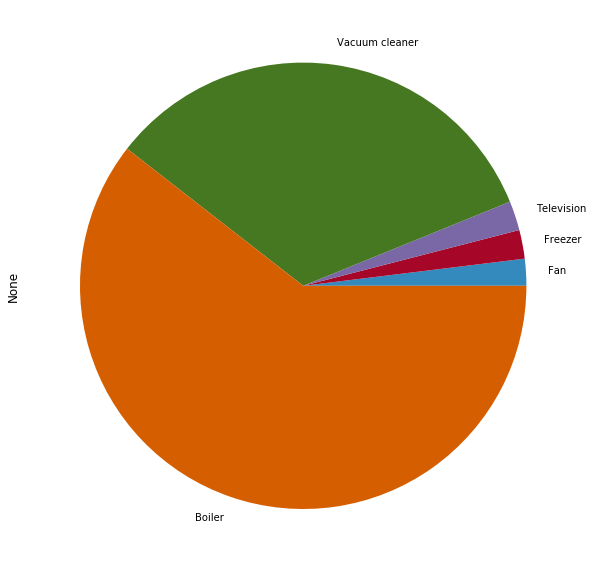

In [147]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Vacuum Cleaner

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 6 (Vacuum Cleaner).Primero veamos el timeframe.

In [148]:
vacuum_cleaner.get_timeframe()
#light.plot()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

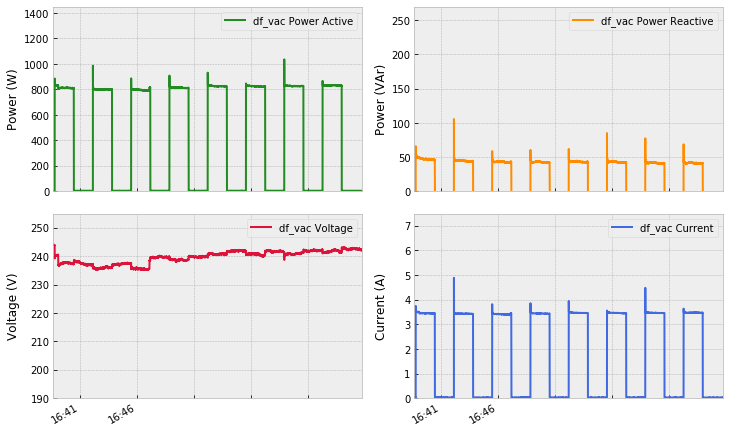

In [149]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_vac = next(elec[5].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vac['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vac['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vac['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vac['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:41','16:46'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_vac.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Freezer

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

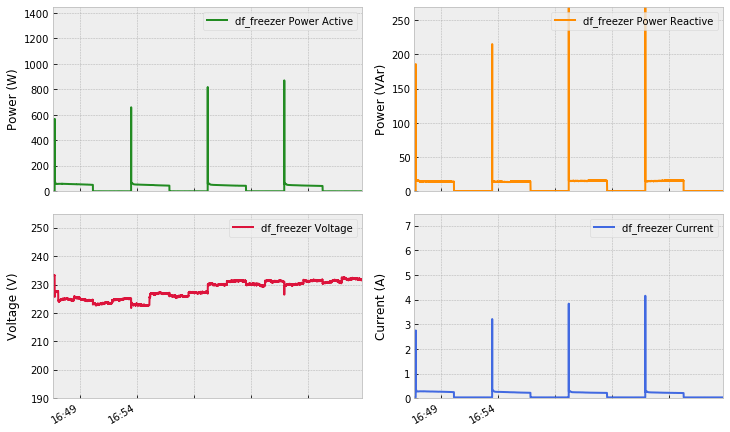

In [150]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

df_freezer = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_freezer['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_freezer['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_freezer['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_freezer['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['16:49','16:54'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

Una nevera esta compuesta basicamente por un compresor  y su electronica asociada,motivo por el cual vemos un pico de potencia reactiva coincidiendo con el arranque del motor con su correspondiente pico de consumo y el potencia.

### Boiler

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

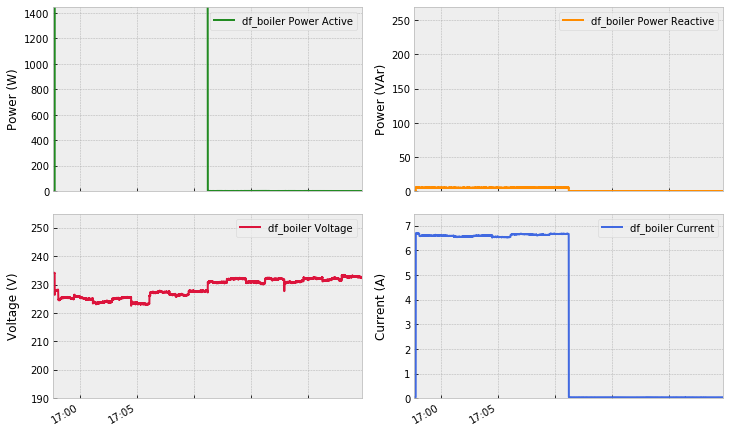

In [151]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_boiler['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_boiler['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_boiler['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_boiler['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:00','17:05'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Fan

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

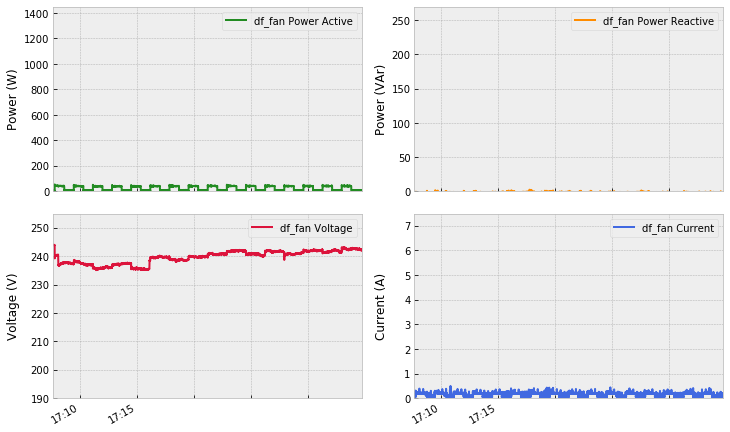

In [154]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

df_fan = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:10','17:15'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_light.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

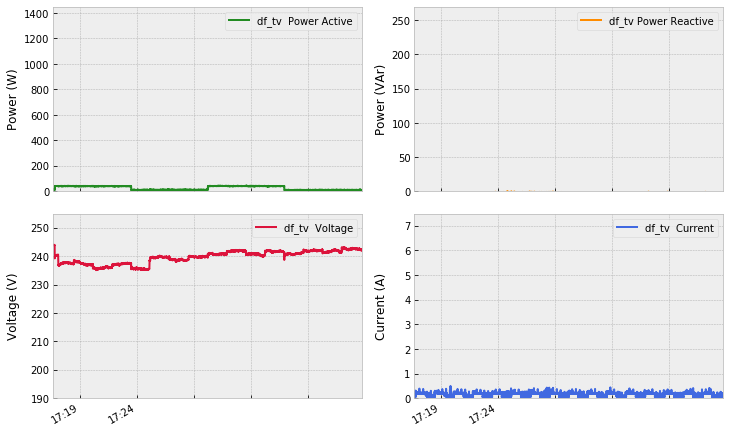

In [155]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['17:19','17:24'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

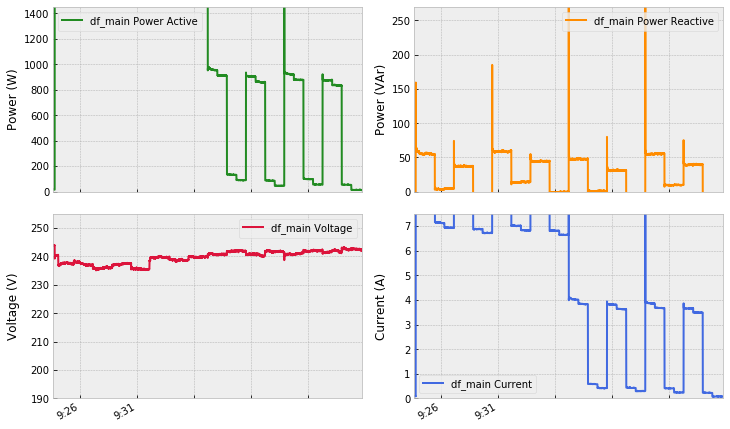

In [156]:
t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final


df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:26','9:31'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

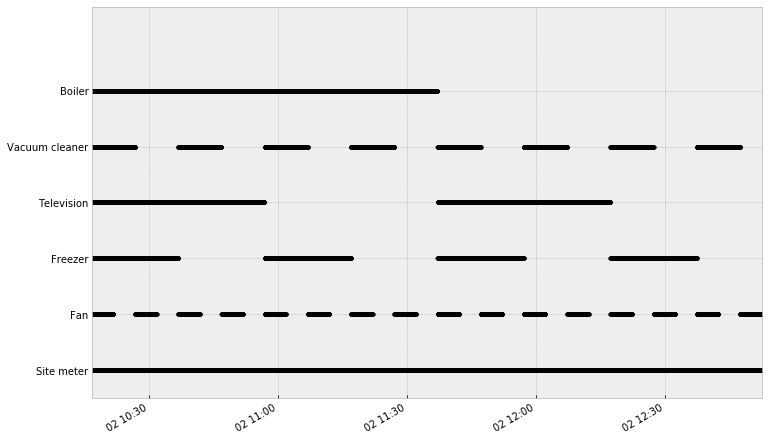

In [157]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

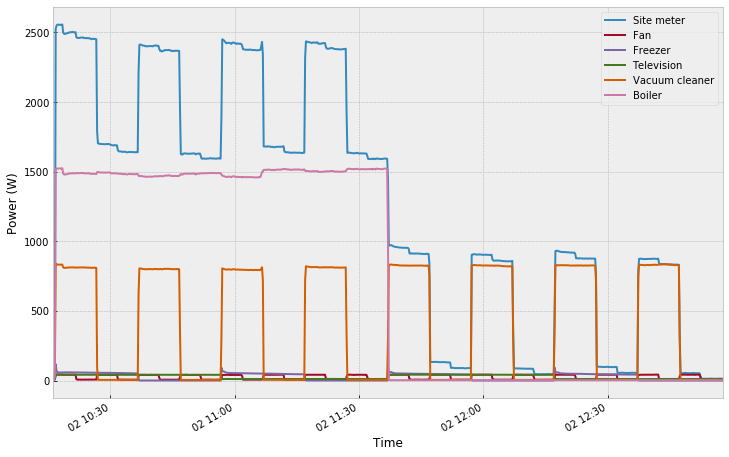

In [158]:
dsualm.set_window(start='2022-02-02', end='2022-02-03')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [159]:
from pandas.plotting import autocorrelation_plot

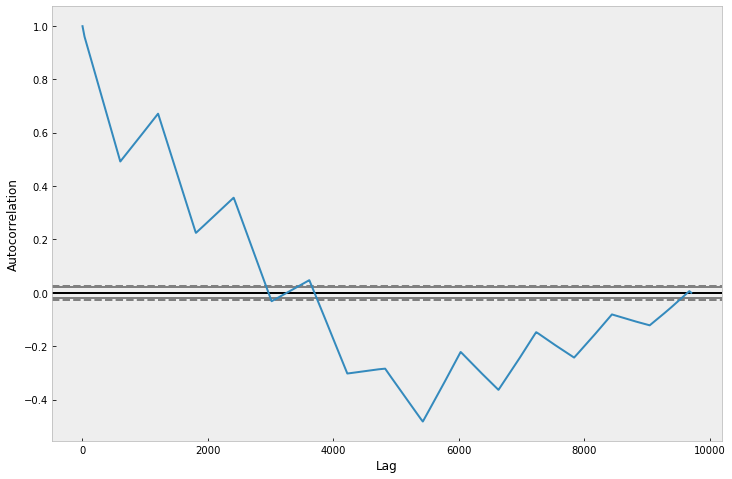

In [160]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [161]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

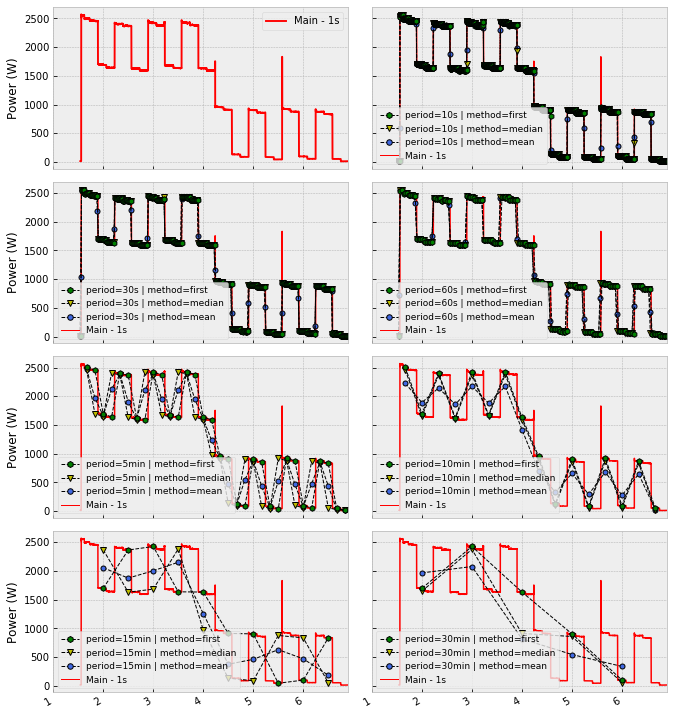

In [162]:
rcParams['figure.figsize'] = (11, 14)

#t0 = '2021-11-10 18:00:00+01:00'
#t1 = '2021-11-12 18:05:00+01:00'

t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-02-02 10:00:00+01:00','2022-02-02 12:57:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [163]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

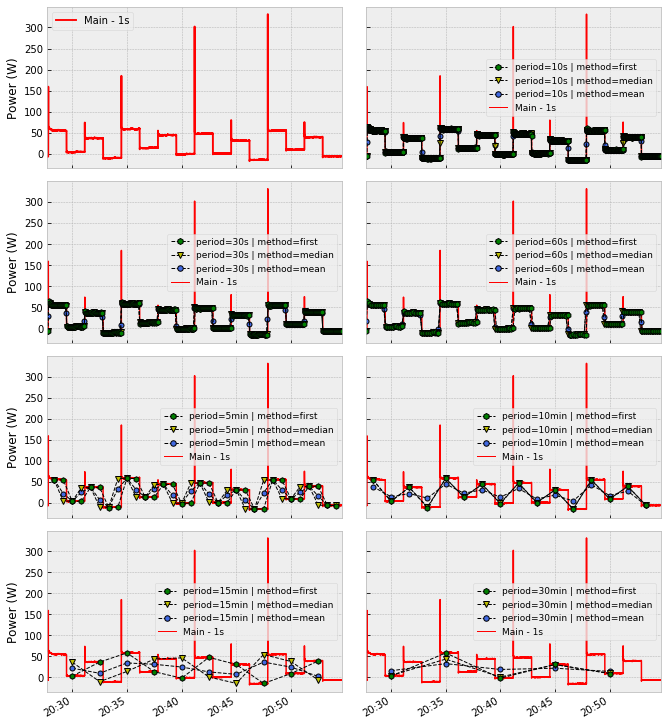

In [164]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-02-02 10:16:00+01:00' #tiempo inicial
t1 = '2022-02-02 12:58:00+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

ax1.set(xlim=('2022-02-02 10:16:00+01:00','2022-02-02 12:58:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass